<a href="https://colab.research.google.com/github/AhmedHamdi101/Fast-Video-Object-Segmentation-by-Reference-Guided-Mask-Propagation/blob/main/pretrain_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from google.colab import drive 
from os import listdir
import os
import matplotlib.pyplot  as plt
import cv2


In [3]:
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [32]:
class resize(object):
  def __init__(self,output_size):
    self.output_size = output_size
  
  def __call__(self,sample):
    sample['image'] = cv2.resize(sample['image'],self.output_size)
    sample['mask'] = cv2.resize(sample['mask'],self.output_size)
    sample['target_mask'] = cv2.resize(sample['target_mask'],self.output_size)
    sample['target_image'] = cv2.resize(sample['target_image'],self.output_size)
    sample['labels'] = cv2.resize(sample['labels'],self.output_size)
    return sample



In [33]:
class preTrainData(Dataset):
  def __init__(self,csv_file,root_dir,transform=None):
    self.images_frame = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  
  def __len__(self):
    return len(self.images_frame)

  def __getitem__(self,idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    img_path = os.path.join(self.root_dir,self.images_frame.iloc[idx,0])
    image = cv2.imread(img_path)
    mask_path = os.path.join(self.root_dir,self.images_frame.iloc[idx,1])
    mask = cv2.imread(mask_path)

    t_img_path = os.path.join(self.root_dir,self.images_frame.iloc[idx,2])
    t_image = cv2.imread(t_img_path)
    t_mask_path = os.path.join(self.root_dir,self.images_frame.iloc[idx,3])
    t_mask = cv2.imread(t_mask_path)


    labels_path = os.path.join(self.root_dir,self.images_frame.iloc[idx,4])
    labels = cv2.imread(labels_path)

    print(idx)
    sample = {'image': image , 'mask': mask , 'target_image':t_image , 'target_mask': t_mask , 'labels':labels }
    # print(self.transform)
    if self.transform:
      sample = self.transform(sample)
    return sample

In [34]:
voc_dataset = preTrainData('/content/gdrive/MyDrive/pre-train-data.csv','/content/gdrive/MyDrive/Voc pretrain data/Pre-Train data/',transform =resize((400,400)))

In [35]:
voc_loader = DataLoader(voc_dataset, batch_size=2, shuffle=True)

1758
1313


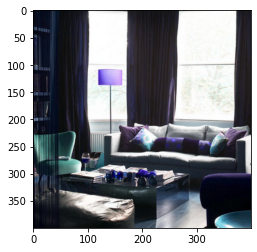

In [36]:
for sample in voc_loader:
  plt.imshow(sample['image'][0])
  plt.show()
  break